# **Data Wrangling**

---



## Selecting Data

There may be times when you, as the analyst, may only want specific data to be shown, especially for large datasets. This is something to keep in mind for your data application projects. Look below for a review of ways to filter your data. 

This is especially important if you are running into issues with missing values or words being placed into numerical columns.

In [8]:
import pandas as pd

df = pd.read_csv('bikebuyers_original.csv')
df.head()

,ID,Marital Status,Gender,Income,Children,Cars,Age,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike
0,19147,Married,Male,40000,0,1,42,Bachelors,Professional,No,0-1 Miles,North America,No
1,22296,Married,Male,70000,0,1,38,Bachelors,Professional,No,0-1 Miles,North America,No
2,25983,Married,Male,70000,0,1,43,Bachelors,Professional,No,0-1 Miles,North America,No
3,29134,Married,Male,60000,4,3,42,Bachelors,Skilled Manual,No,10+ Miles,North America,No
4,27388,Married,Male,60000,3,2,66,Bachelors,Management,No,1-2 Miles,North America,No


In [9]:
df.dtypes

ID                   int64
Marital Status      object
Gender              object
Income               int64
Children             int64
Cars                 int64
Age                  int64
Education           object
Occupation          object
Home Owner          object
Commute Distance    object
Region              object
Purchased Bike      object
dtype: object

In [10]:
df_reduced = df[['Marital Status', 'Gender', 'Education']]
df_reduced.head()

,Marital Status,Gender,Education
0,Married,Male,Bachelors
1,Married,Male,Bachelors
2,Married,Male,Bachelors
3,Married,Male,Bachelors
4,Married,Male,Bachelors


In [11]:
df = pd.read_csv('bikebuyers_original.csv', usecols=['Marital Status', 'Gender', 'Education'])
df.head()

,Marital Status,Gender,Education
0,Married,Male,Bachelors
1,Married,Male,Bachelors
2,Married,Male,Bachelors
3,Married,Male,Bachelors
4,Married,Male,Bachelors


In [12]:
df = pd.read_csv('bikebuyers.csv', nrows=100)
print(df.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'bikebuyers.csv'

In [ ]:
df = pd.read_csv('bikebuyers.csv', skiprows=range(1,50), nrows=5)
df.shape

(5, 19)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/bikebuyers.csv')
print(f'Number of rows: {len(df)}')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/bikebuyers.csv', nrows=100)
print(f'Number of rows: {len(df)}')

%timeit pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/bikebuyers.csv')
%timeit pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/bikebuyers.csv', nrows=100)

Number of rows: 1000
Number of rows: 100
6.06 ms ± 365 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.33 ms ± 161 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## **Converting Between Data Types**

This is not the best example, but the point of this is that sometimes the following may happen:
* Words may be placed for missing values, etc., in numerical columns, turning the ENTIRE column into a string (even after you get rid of the instances)
* Typos turning an entire numerical column into a string (object)
* For any reason, a numerical column was imported as a string (object)

This is often noticed when a numerical column can't be used in a function or doesn't show up on an analysis that includes all numerical columns (such as descriptive statistics, multivariate regression, etc.)

Some ways to fix this are the following:
* Get rid of instances that have an object in a numerical column, or turn them into missing values
* Re-save this "filtered" dataframe as a new dataframe
* Convert the column into an integer or float

There may also be times that numerical columns may be turned into an object or string. Example code is given below.

In [ ]:
import pandas as pd

df = pd.DataFrame({'a':[1, 2, 3, 4, 5], 'b':[1.0, 2.0, 3.0, 4.0, 5.0], 'c':['a', 'b', 'c', 'd', 'e']})
df.dtypes

a      int64
b    float64
c     object
dtype: object

In [ ]:
# Option 1: Cast individually; "inplace" is assumed; no need to save to a new Dataframe
df.a.astype('object')
df.b.astype('object')
df.c.astype('object')
print(df.dtypes, '\n')

# Option 2: Case several at once to the same type; must save to a new DataFrame
df = df[['a', 'b', 'c']].astype('object')
print(df.dtypes)

a      int64
b    float64
c     object
dtype: object 

a    object
b    object
c    object
dtype: object


In [ ]:
df.a.mean()   # will automatically convert 'a' to an integer for the function, if all the values can be changed to an integer

3.0

In [ ]:
df.c.mean()  # notice this type of error message. 

# if you see this type of error message, this means that your column cannot be turned into a float or integer
# look through the column to see what needs fixed, or run a loop

TypeError: Could not convert abcde to numeric

### **Ordinal Data Conversion**

**Ordinal** Variable: Some columns have categories that can be ordered in rankings. In this case, the categorical column can be turned to numerical by giving each value an integer (ranking). This only makes sense if each category is actually ordered, like distance or education level below.

**Nominal** Variable: If there are multiple categories, but no order to them, then the only way to turn the categorical column into numerical is to separate each category into a new variable, and give 0 or 1. These are called *dummy variables*, which will be covered next semester.

In [ ]:
# Don't forget to mount Google Drive if you haven't already:
# from google.colab import drive
# drive.mount('/content/drive')

import pandas as pd

df = pd.read_csv('bikebuyers.csv', 
                 usecols=['ID', 'Income', 'Age', 'Children', 'Region', 
                          'Marital Status', 'Gender', 'Cars', 'Home Owner',
                          'Education', 'Commute Distance', 'Purchased Bike'],
                 index_col=['ID'])

# Create copies or the orignal features in order to keep both versions
df['Education numeric'] = df['Education']
df['Commute Distance numeric'] = df['Commute Distance']
df.head()

,Marital Status,Gender,Income,Children,Cars,Age,Education,Home Owner,Commute Distance,Region,Purchased Bike,Education numeric,Commute Distance numeric
ID,,,,,,,,,,,,,
19147,Married,Male,40000,0,1,42,Bachelors,No,0-1 Miles,North America,No,Bachelors,0-1 Miles
22296,Married,Male,70000,0,1,38,Bachelors,No,0-1 Miles,North America,No,Bachelors,0-1 Miles
25983,Married,Male,70000,0,1,43,Bachelors,No,0-1 Miles,North America,No,Bachelors,0-1 Miles
29134,Married,Male,60000,4,3,42,Bachelors,No,10+ Miles,North America,No,Bachelors,10+ Miles
27388,Married,Male,60000,3,2,66,Bachelors,No,1-2 Miles,North America,No,Bachelors,1-2 Miles


In [ ]:
df['Commute Distance'].unique()

array(['0-1 Miles', '10+ Miles', '1-2 Miles', '2-5 Miles', '5-10 Miles'],
      dtype=object)

In [ ]:
# One-By-One method:
df['Education numeric'].replace("Partial High School", 1, inplace=True)
df['Education numeric'].replace("High School", 2, inplace=True)
df['Education numeric'].replace("Partial College", 3, inplace=True)
df['Education numeric'].replace("Bachelors", 4, inplace=True)
df['Education numeric'].replace("Graduate Degree", 5, inplace=True)
df.head()

,Marital Status,Gender,Income,Children,Cars,Age,Education,Home Owner,Commute Distance,Region,Purchased Bike,Education numeric,Commute Distance numeric
ID,,,,,,,,,,,,,
19147,Married,Male,40000,0,1,42,Bachelors,No,0-1 Miles,North America,No,4,0-1 Miles
22296,Married,Male,70000,0,1,38,Bachelors,No,0-1 Miles,North America,No,4,0-1 Miles
25983,Married,Male,70000,0,1,43,Bachelors,No,0-1 Miles,North America,No,4,0-1 Miles
29134,Married,Male,60000,4,3,42,Bachelors,No,10+ Miles,North America,No,4,10+ Miles
27388,Married,Male,60000,3,2,66,Bachelors,No,1-2 Miles,North America,No,4,1-2 Miles


In [ ]:
# List method: [key, key, key] --> [value, value, value]
# NOTE: this technique will generate an error if none of those strings are found
# Therefore, to test this code, re-import the data into df before running this

df = pd.read_csv('bikebuyers.csv', 
                 usecols=['ID', 'Income', 'Age', 'Children', 'Region', 
                          'Marital Status', 'Gender', 'Cars', 'Home Owner',
                          'Education', 'Commute Distance', 'Purchased Bike'],
                 index_col=['ID'])

# Create copies or the orignal features in order to keep both versions
df['Commute Distance numeric'] = df['Commute Distance']
df['Education numeric'] = df['Education'].replace(["Partial High School", "High School", 
                                                   "Partial College", "Bachelors", "Graduate Degree"],
                                                  [1, 2, 3, 4, 5])

df.head()

,Marital Status,Gender,Income,Children,Cars,Age,Education,Home Owner,Commute Distance,Region,Purchased Bike,Commute Distance numeric,Education numeric
ID,,,,,,,,,,,,,
19147,Married,Male,40000,0,1,42,Bachelors,No,0-1 Miles,North America,No,0-1 Miles,4
22296,Married,Male,70000,0,1,38,Bachelors,No,0-1 Miles,North America,No,0-1 Miles,4
25983,Married,Male,70000,0,1,43,Bachelors,No,0-1 Miles,North America,No,0-1 Miles,4
29134,Married,Male,60000,4,3,42,Bachelors,No,10+ Miles,North America,No,10+ Miles,4
27388,Married,Male,60000,3,2,66,Bachelors,No,1-2 Miles,North America,No,1-2 Miles,4


In [ ]:
# Dictionary method: (key:value pair --> from:to pair)
df['Commute Distance numeric'].replace({"0-1 Miles":0, "1-2 Miles":1, "2-5 Miles":2, "5-10 Miles":5, "10+ Miles":10},
           inplace=True)

df.head()

,Marital Status,Gender,Income,Children,Cars,Age,Education,Home Owner,Commute Distance,Region,Purchased Bike,Commute Distance numeric,Education numeric
ID,,,,,,,,,,,,,
19147,Married,Male,40000,0,1,42,Bachelors,No,0-1 Miles,North America,No,0,4
22296,Married,Male,70000,0,1,38,Bachelors,No,0-1 Miles,North America,No,0,4
25983,Married,Male,70000,0,1,43,Bachelors,No,0-1 Miles,North America,No,0,4
29134,Married,Male,60000,4,3,42,Bachelors,No,10+ Miles,North America,No,10,4
27388,Married,Male,60000,3,2,66,Bachelors,No,1-2 Miles,North America,No,1,4


### Test the Categorical versus Numeric versions

**Classification Model Using Purchased Bike (yes/no)**: There is an analytical method called *decision tree*, covered next semester, which actually turns every column to categorical, THEN creates a model based on those categories. The following code simply tests whether numerical or categorical are more accurate for this dataset. 

In [ ]:
# Import packages

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
# Determine which label and features to use
# Model 1: Education:numeric, Commute:numeric

# For a classification model, use the categorical version of the label: Purchased Bike
y = df['Purchased Bike']

# Drop the label and categorical versions of Education and Commute Distance
X = df.drop(columns=['Commute Distance', 'Education', 'Purchased Bike'])

# We still need dummy codes when using the categorical versions
X = pd.get_dummies(X, columns=X.select_dtypes(['object']).columns, drop_first=True)

# MinMax Scaling
from sklearn import preprocessing
X = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(X), columns=X.columns)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create and fit the Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)

# Predict the labels for test dataset
y_pred = clf.predict(X_test)

In [ ]:
y_test_dummies = pd.get_dummies(y_test, drop_first=True)
y_pred_dummies = pd.get_dummies(y_pred, drop_first=True)
        
print(f"Accuracy n/n:\t{metrics.accuracy_score(y_test, y_pred)}")
print(f"Precision n/n:\t{metrics.precision_score(y_test_dummies, y_pred_dummies, labels=['No', 'Yes'])}")
print(f"Recall n/n:\t{metrics.recall_score(y_test_dummies, y_pred_dummies, labels=['No', 'Yes'])}")
print(f"F1 n/n:\t\t{metrics.f1_score(y_test_dummies, y_pred_dummies, labels=['No', 'Yes'])}")

Accuracy n/n:	0.6466666666666666
Precision n/n:	0.6137931034482759
Recall n/n:	0.6402877697841727
F1 n/n:		0.6267605633802816


In [ ]:
# Model 1: Education:numeric, Commute:numeric

X = df.drop(columns=['Purchased Bike', 'Commute Distance', 'Education'])
X = pd.get_dummies(X, columns=X.select_dtypes(['object']).columns, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier(random_state=1).fit(X_train,y_train)
print(f"Accuracy n/n:\t{metrics.accuracy_score(y_test, clf.predict(X_test))}")

# Model 2: Education:categorical, Commute:categorical

X = df.drop(columns=['Purchased Bike', 'Commute Distance numeric', 'Education numeric'])
X = pd.get_dummies(X, columns=X.select_dtypes(['object']).columns, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier(random_state=1).fit(X_train,y_train)
print(f"Accuracy c/c:\t{metrics.accuracy_score(y_test, clf.predict(X_test))}")

# Model 3: Education:numeric, Commute:categorical

X = df.drop(columns=['Purchased Bike', 'Commute Distance', 'Education numeric'])
X = pd.get_dummies(X, columns=X.select_dtypes(['object']).columns, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier(random_state=1).fit(X_train,y_train)
print(f"Accuracy n/c:\t{metrics.accuracy_score(y_test, clf.predict(X_test))}")

# Model 4: Education:categorical, Commute:numeric

X = df.drop(columns=['Purchased Bike', 'Commute Distance numeric', 'Education'])
X = pd.get_dummies(X, columns=X.select_dtypes(['object']).columns, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier(random_state=1).fit(X_train,y_train)
print(f"Accuracy c/n:\t{metrics.accuracy_score(y_test, clf.predict(X_test))}")


Accuracy n/n:	0.6466666666666666
Accuracy c/c:	0.64
Accuracy n/c:	0.65
Accuracy c/n:	0.6533333333333333


## Binning: Minimum Group Percent

In [ ]:
# Don't forget to mount Google Drive if you haven't already:
# from google.colab import drive
# drive.mount('/content/drive')

import pandas as pd

df = pd.read_csv('twitter_small.csv')
print(df.shape)
df.head()

(5000, 16)


,Gender,Weekday,Hour,Day,Lang,IsReshare,Reach,RetweetCount,Likes,Klout,Sentiment,Country,State,StateCode,City,text
0,Unknown,Sunday,13,17,en,0,1216,0,0,50,0.0,United States,California,US-CA,Oakland,#Software #Development Engineer AWS Apps neede...
1,Male,Tuesday,11,8,en,1,615,3,0,51,0.0,United States,California,US-CA,Culver City,RT @tedmcfa: We are hiring: AWS Technical Recr...
2,Unknown,Monday,4,13,en,0,676,0,0,37,2.0,Bhutan,Thimphu,BT,Thimphu,Check out this interesting article about build...
3,Unisex,Wednesday,15,24,tr,0,42571,0,0,49,0.0,Turkey,Izmir,TR,zmir,Zombiler uyandnda Amazon Web Services hazr ola...
4,Male,Sunday,19,12,en,0,15650,0,0,58,0.0,United States,New York,US-NY,Manhattan,@mpacific just use aws


Notice the number of countries, most of which are only mentioned once or twice in the dataset. This is going to be a major issue if we decide to compare countries. So the following code actually takes all of the countries that are only mentioned once or twice in the dataset, then groups them together into a new category called "Other."

In [ ]:
df.Country.unique()

array(['United States', 'Bhutan', 'Turkey', 'Taiwan', 'Ireland', 'Canada',
       'Mexico', 'Ecuador', 'United Kingdom', 'South Korea', 'Japan',
       'Thailand', 'Australia', 'Spain', 'Germany', 'New Zealand',
       'Brazil', 'Argentina', 'France', 'India', 'Finland', 'Poland',
       'United Arab Emirates', 'Nepal', 'Venezuela', 'Indonesia',
       'Philippines', 'Israel', 'Sweden', 'Italy', 'Austria',
       'Costa Rica', 'Chile', 'Netherlands', 'China', 'Serbia',
       'Pakistan', 'Dominican Republic', 'Croatia', 'Panama', 'Malaysia',
       'South Africa', 'Iran', 'Saudi Arabia', 'Paraguay', 'Romania',
       'Ivory Coast', 'Morocco', 'San Marino', 'Colombia', 'Belgium',
       'Latvia', 'Bangladesh', 'Greece', 'Czech Republic', 'Norway',
       'Peru', 'Russia', 'Luxembourg', 'Belarus', 'Tanzania',
       'Switzerland', 'Bulgaria', 'Nigeria', 'Puerto Rico', 'Cyprus',
       'Angola', 'Kenya', 'Ghana', 'Viet Nam', 'Portugal', 'Ukraine',
       'Egypt', 'Vietnam', 'Sri Lanka', '

In [ ]:
df['Country'].value_counts()

United States     2422
United Kingdom     489
India              340
France             201
Australia          200
                  ... 
Belarus              1
Iran                 1
Bhutan               1
Ivory Coast          1
Maldives             1
Name: Country, Length: 86, dtype: int64

The following shows how much each individual country takes up the dataset. Any country that makes up less than 5% of the dataset is gathered into the "Other" category.

In [ ]:
df_country = pd.DataFrame({"Count":df['Country'].value_counts(),
                           "Proportion":df['Country'].value_counts() / df.shape[0]})
df_country

,Count,Proportion
United States,2422,0.4844
United Kingdom,489,0.0978
India,340,0.0680
France,201,0.0402
Australia,200,0.0400
...,...,...
Belarus,1,0.0002
Iran,1,0.0002
Bhutan,1,0.0002
Ivory Coast,1,0.0002


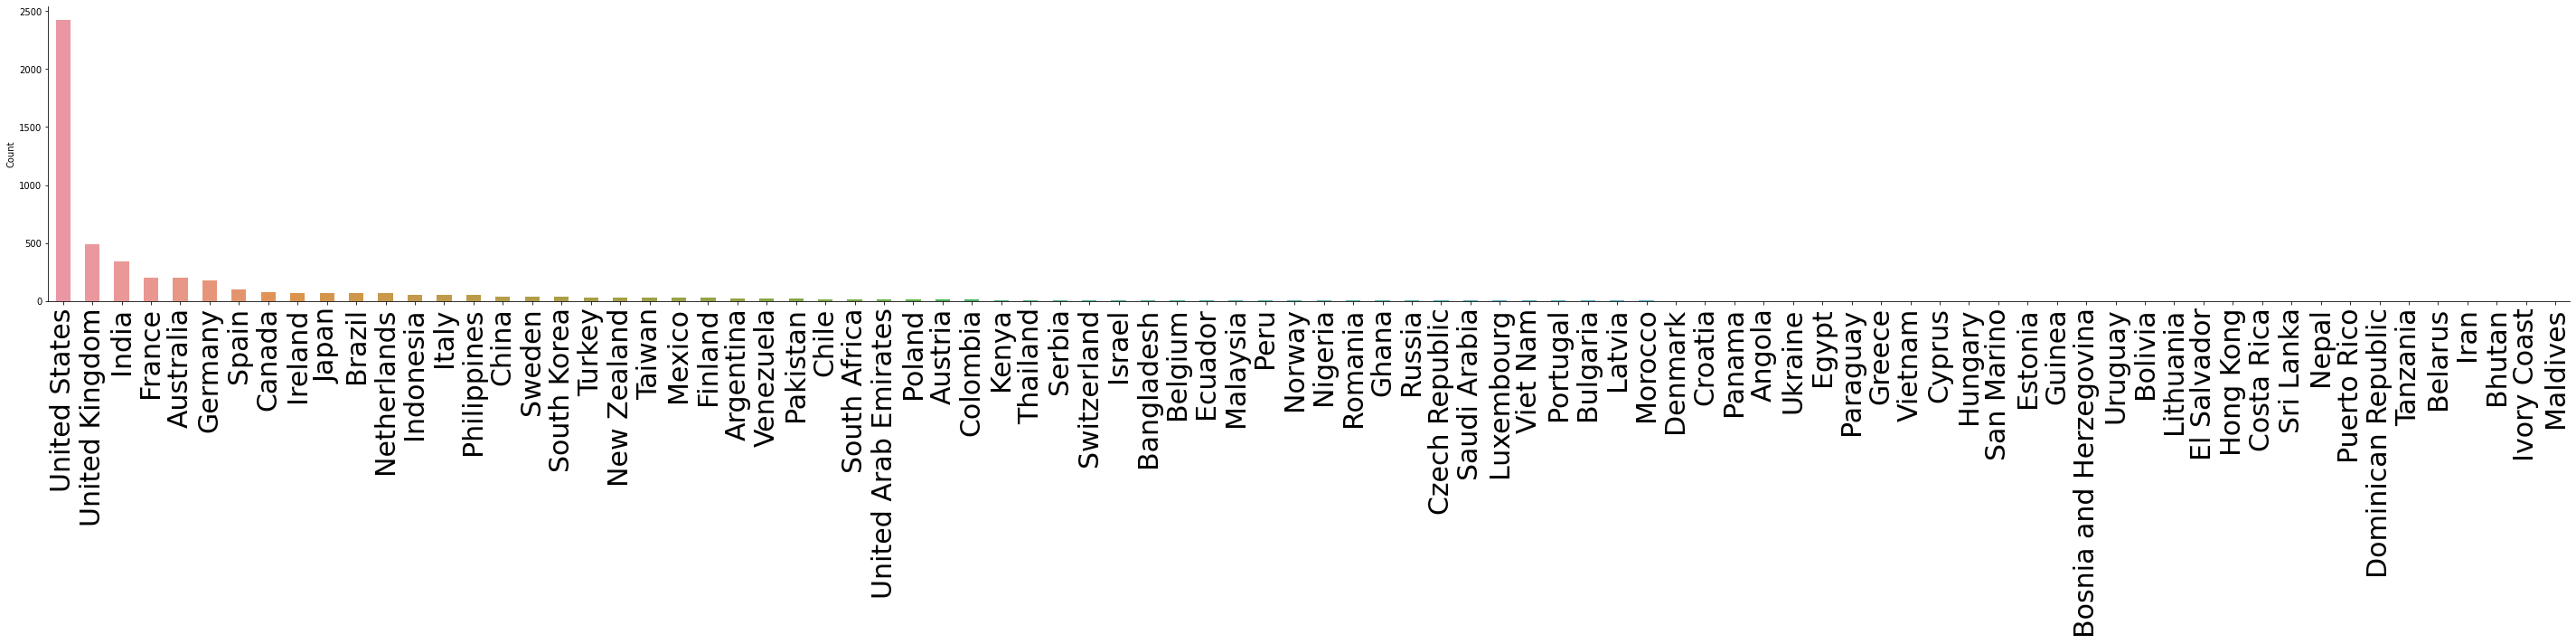

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(50, 6))
ax.xaxis.set_major_locator(mticker.FixedLocator(ax.get_xticks().tolist()))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontdict={'fontsize': 30})
sns.despine()
sns.barplot(x=df_country.index, y=df_country.Count, width=.5);

In [ ]:
# Get a list of countries where the proportion of records is < 0.05
# The country name is in the index of .value_counts() which is why we use .index
other_list = df['Country'].value_counts()[df['Country'].value_counts() / len(df) < 0.05].index
other_list

Index(['France', 'Australia', 'Germany', 'Spain', 'Canada', 'Ireland', 'Japan',
       'Brazil', 'Netherlands', 'Indonesia', 'Italy', 'Philippines', 'China',
       'Sweden', 'South Korea', 'Turkey', 'New Zealand', 'Taiwan', 'Mexico',
       'Finland', 'Argentina', 'Venezuela', 'Pakistan', 'Chile',
       'South Africa', 'United Arab Emirates', 'Poland', 'Austria', 'Colombia',
       'Kenya', 'Thailand', 'Serbia', 'Switzerland', 'Israel', 'Bangladesh',
       'Belgium', 'Ecuador', 'Malaysia', 'Peru', 'Norway', 'Nigeria',
       'Romania', 'Ghana', 'Russia', 'Czech Republic', 'Saudi Arabia',
       'Luxembourg', 'Viet Nam', 'Portugal', 'Bulgaria', 'Latvia', 'Morocco',
       'Denmark', 'Croatia', 'Panama', 'Angola', 'Ukraine', 'Egypt',
       'Paraguay', 'Greece', 'Vietnam', 'Cyprus', 'Hungary', 'San Marino',
       'Estonia', 'Guinea', 'Bosnia and Herzegovina', 'Uruguay', 'Bolivia',
       'Lithuania', 'El Salvador', 'Hong Kong', 'Costa Rica', 'Sri Lanka',
       'Nepal', 'Puerto Rico'

In [ ]:
# Replace the value of any country in that list (using the .isin() method) with 'Other'
df.loc[df['Country'].isin(other_list), 'Country'] = 'Other'

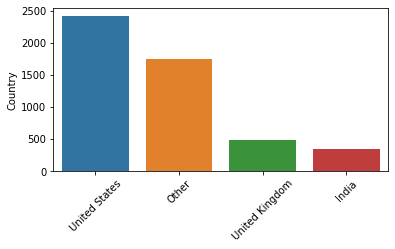

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.xaxis.set_major_locator(mticker.FixedLocator(ax.get_xticks().tolist()))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# For x we provide a unique list of values found in df
# For y we provide the list of value_counts for each of those countries
sns.barplot(x=df['Country'].unique(), y=df['Country'].value_counts());

# **Practice**

---



## Practice 1: Loan Status
Read the student performance data into a DataFrame. However, only read in the first 1000 rows and only read in the columns: 'loan_status', 'home_ownership', 'annual_inc', 'dti', and 'purpose'. Print out the first 5 records in order to examine the data. Then print the value counts of loan_status

In [ ]:
# Don't forget to mount Google Drive if needed:
# from google.colab import drive
# drive.mount('/content/drive')

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/lc_small.csv', 
                 nrows=1000, 
                 usecols=['loan_status', 'home_ownership', 'annual_inc', 'dti', 'purpose'])
df.head()

,loan_status,purpose,home_ownership,annual_inc,dti
0,Fully Paid,debt_consolidation,RENT,62500.0,2.31
1,Current,debt_consolidation,MORTGAGE,68000.0,16.03
2,Current,credit_card,MORTGAGE,150000.0,17.63
3,Current,credit_card,MORTGAGE,164000.0,19.51
4,Current,debt_consolidation,MORTGAGE,122000.0,50.55


In [ ]:
df['loan_status'].value_counts()

Current               621
Fully Paid            267
Charged Off            92
Late (31-120 days)     13
In Grace Period         6
Late (16-30 days)       1
Name: loan_status, dtype: int64

## Practice 2: Ordinal Conversion
Convert both loan_status and home_ownership to ordinal data types where:
* loan_status:
  * Charged Off = 0
  * Late (31-120 days) = 0
  * Late (16-30 days) = 1
  * In Grace Period = 1
  * Current = 2
  * Fully Paid = 2
* home_ownership
  * ANY = 0
  * RENT = 1
  * MORTGAGE = 2
  * OWN = 3

Make sure both columns are int64 data types when you are finished and then print out the dtype of all features.

In [ ]:
df.replace({"Charged Off":0, "Late (31-120 days)":0, "Late (16-30 days)":1, 
            "In Grace Period":1, "Current":2, "Fully Paid":2, 'ANY':0,
            'RENT':1, 'MORTGAGE':2, 'OWN':3},
           inplace=True)

df.dtypes

loan_status         int64
purpose            object
home_ownership      int64
annual_inc        float64
dti               float64
dtype: object

## Practice 3: Binning Purpose

Bin the values of *purpose* so that any loan purpose that represents less than 5% of the cases is binned into an "Other" value. Print out the value counts of *purpose* afterward to verify that the process worked.

In [ ]:
other_list = df['purpose'].value_counts()[df['purpose'].value_counts() / len(df) < 0.05].index
df.loc[df['purpose'].isin(other_list), 'purpose'] = 'other'
df.purpose.value_counts()

debt_consolidation    558
credit_card           230
other                 154
home_improvement       58
Name: purpose, dtype: int64

## Challenge Problem: Compare Models

There is one record with missing data in these 1000 rows. Use .dropna() to eliminate that record. Then:
* Build a DecisionTreeClassifier model using the DataFrame you have just cleaned to predict *loan_status*. 
* Use a random_state=1 for both a 70/30 split and the DecisionTreeClassifier. 
* Be sure to dummy code the *purpose* feature.
* Print the accuracy score. 

Next, re-import the data and perform the same prior cleaning steps **except**:
* Do not bin the *purpose* feature. But remember to still bin home_ownership the same way
* Remember to dummy code the *purpose* feature again. 
* Run another DecisionTreeClassifier model predicting *loan_status* based on this version of the dataset (with **all** *purpose* values instead of the binned values). 

Which model is better?

In [ ]:
# Binned model

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

df.dropna(inplace=True) # Drop the row with missing data

y = df['loan_status'] # Label
X = df.drop(columns=['loan_status']) # Notice we don't need to .assign(const=1)
X = pd.get_dummies(X, columns=['purpose']) # Dummy code purpose

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
print(f'Binned model accuracy:\t{clf.score(X_test, y_test)}')

Binned model accuracy:	0.7166666666666667


In [ ]:
# Unbinned model

# Read in a fresh copy of the data with all of the original loan purposes
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/lc_small.csv', 
                 nrows=1000, 
                 usecols=['loan_status', 'home_ownership', 'annual_inc', 'dti', 'purpose'])

# Drop the row with missing data again
df.dropna(inplace=True)

# Replace text values with ordinal values again
df.replace({"Charged Off":0, "Late (31-120 days)":0, "Late (16-30 days)":1, 
            "In Grace Period":1, "Current":2, "Fully Paid":2, 'ANY':0,
            'RENT':1, 'MORTGAGE':2, 'OWN':3},
           inplace=True)

# Do not performing binning here

y = df['loan_status'] # Label
X = df.drop(columns=['loan_status']) # Notice we don't need to .assign(const=1)
X = pd.get_dummies(X, columns=['purpose']) # Dummy code purpose

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
print(f'Binned model accuracy:\t{clf.score(X_test, y_test)}')

Binned model accuracy:	0.7533333333333333
